# 🌸 Clustering no Dataset Iris com DBSCAN

Este projeto aplica o algoritmo de clustering **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) ao clássico dataset Iris. A proposta é realizar uma análise não supervisionada, ajustar hiperparâmetros para obter três agrupamentos significativos, detectar outliers e interpretar os resultados usando técnicas de visualização dimensional.

---

## 🚀 Objetivos

- Agrupar instâncias do dataset Iris com DBSCAN
- Detectar e analisar outliers automaticamente
- Avaliar os agrupamentos com Silhouette, Davies-Bouldin e Calinski-Harabasz
- Visualizar os clusters com PCA, t-SNE e UMAP

---

## 🧐 Por que DBSCAN?

- ✅ Identifica clusters de formatos arbitrários
- ✅ Não exige o número de clusters como entrada
- ✅ Detecta outliers naturalmente (rótulo -1)

### Parâmetros principais:
- `eps`: Raio de vizinhança
- `min_samples`: Número mínimo de vizinhos para formar uma região densa

---

## ⚙️ Etapas do Projeto

1. Carga e análise exploratória do dataset Iris
2. Normalização com StandardScaler
3. Busca do melhor `eps` para gerar 3 clusters
4. Aplicar DBSCAN com melhores parâmetros
5. Avaliação quantitativa dos agrupamentos
6. Visualização com PCA, t-SNE e UMAP
7. Análise da dispersão com Pairplot

---

## 📊 Avaliações Utilizadas

| Métrica                 | Interpretação                                                    |
|--------------------------|------------------------------------------------------------------|
| **Silhouette Score**     | -1 a 1 → Ideal: > 0.5 → Quanto mais próximo de 1, melhor separação  |
| **Davies-Bouldin Index** | ≥ 0 → Ideal: < 0.6 → Quanto menor, melhor                         |
| **Calinski-Harabasz**    | Sem limite fixo → Valores > 100 são bons                           |

---

## 👀 Interpretação dos Gráficos

### 🔹 PCA (Principal Component Analysis)
- Redução linear para 2D
- Mostra separação global entre grupos
- Outliers (rótulo `-1`) aparecem dispersos

### 🔹 t-SNE
- Evidencia vizinhanças locais
- Ótimo para ver separações entre grupos pequenos
- Rótulo `-1` identifica ruídos

### 🔹 UMAP
- Preserva estrutura local e global
- Mostra padrões complexos com boa separação

---

## 📊 Resultado Final

- Melhores parâmetros encontrados automaticamente (ex: `eps=0.5`)
- Clusters bem definidos em PCA, t-SNE e UMAP
- Outliers identificados e ignorados nas avaliações
- Visualizações claras com legenda explicando os rótulos: `0`, `1`, `2`, `-1`

---

## ✨ Conclusão

O uso do DBSCAN para o Iris demonstrou ser eficaz na detecção de três grupos naturais de flores, além de identificar outliers. A análise foi enriquecida com métricas quantitativas e gráficos interativos que facilitaram a interpretação dos resultados. DBSCAN se mostrou uma excelente opção para datasets com formações não lineares e ruídos presentes.

---

## 🔍 Requisitos
- Python 3.10+
- pandas, numpy, matplotlib, seaborn
- scikit-learn, umap-learn


📌 Estrutura dos dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None

📌 Estatísticas descritivas:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.

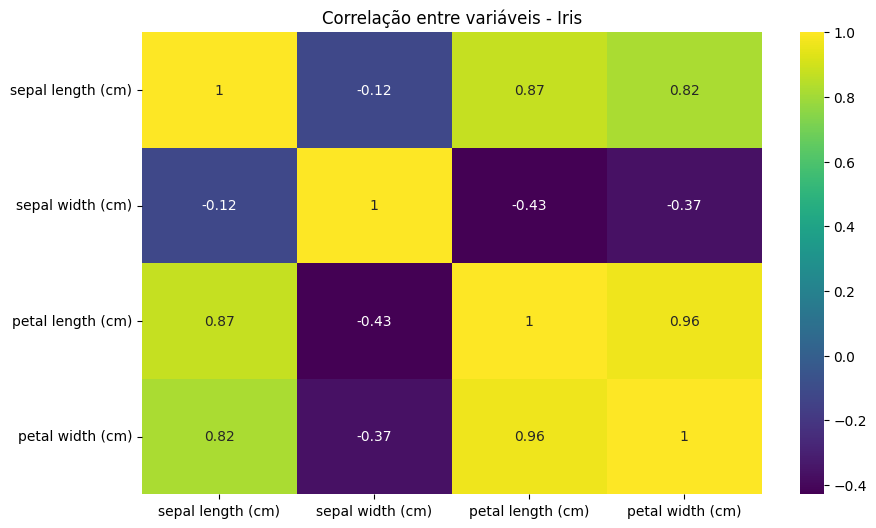


✅ Melhor valor de eps encontrado para 3 clusters: 0.5

🔍 Avaliações dos clusters (ignorando outliers):
- Silhouette Score: 0.6029  → (Intervalo: -1 a 1 | Ideal: > 0.5 | Quanto mais próximo de 1, melhor separação e coesão)
- Davies-Bouldin Index: 0.5794  → (Intervalo: >= 0 | Ideal: < 0.6 | Quanto menor, melhor qualidade do agrupamento)
- Calinski-Harabasz Index: 280.8354  → (Sem limite fixo | Ideal: quanto maior, melhor → valores > 100 geralmente são bons)

📊 Número de clusters encontrados (excluindo outliers): 3


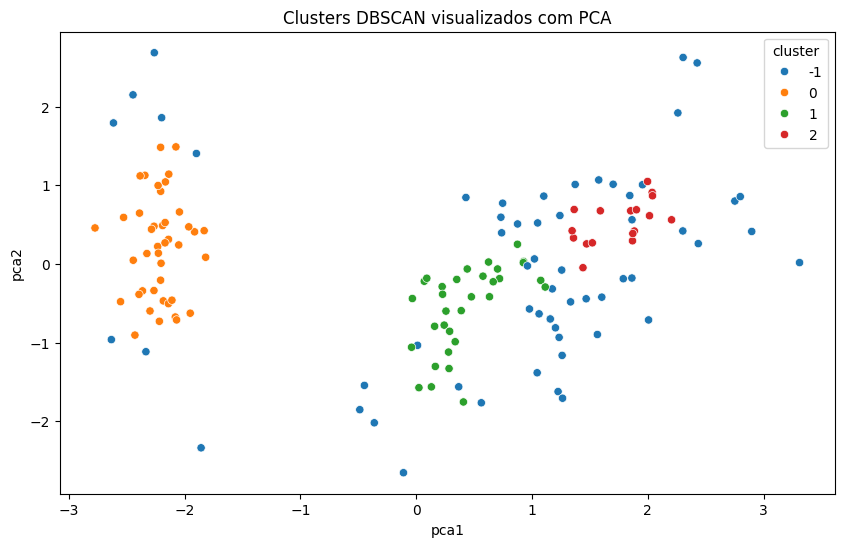


📌 Interpretação - PCA:
• Os pontos foram agrupados com base em características semelhantes das flores.
• A cor representa o rótulo atribuído pelo DBSCAN:
   →  0, 1, 2 são clusters encontrados automaticamente.
   → -1 representa pontos considerados outliers (fora de regiões densas).
• A projeção com PCA ajuda a visualizar a separação geral entre os grupos em apenas 2 dimensões.



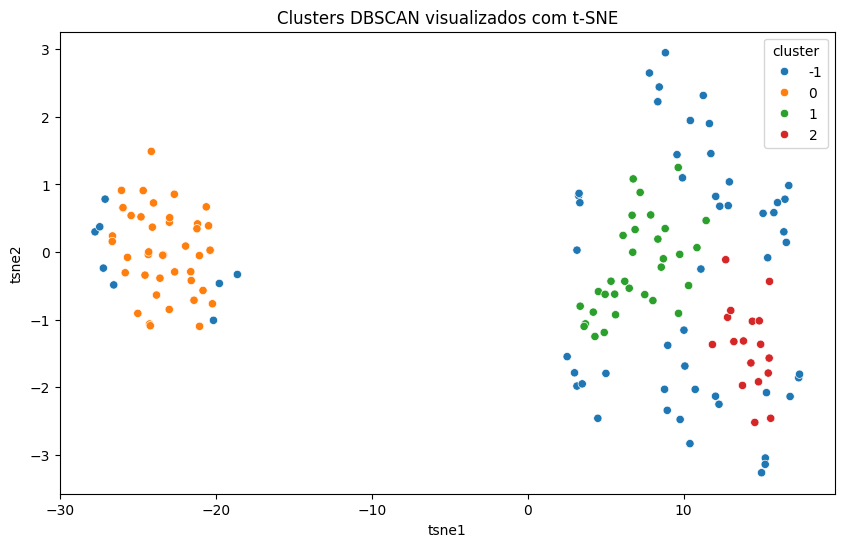


📌 Interpretação - t-SNE:
• Clusters aparecem mais espalhados para evidenciar separações locais entre pontos similares.
• O rótulo -1 mostra os outliers (dados ruidosos).
• A técnica foca na preservação de vizinhanças locais e, por isso, evidencia bem pequenas diferenças entre grupos.



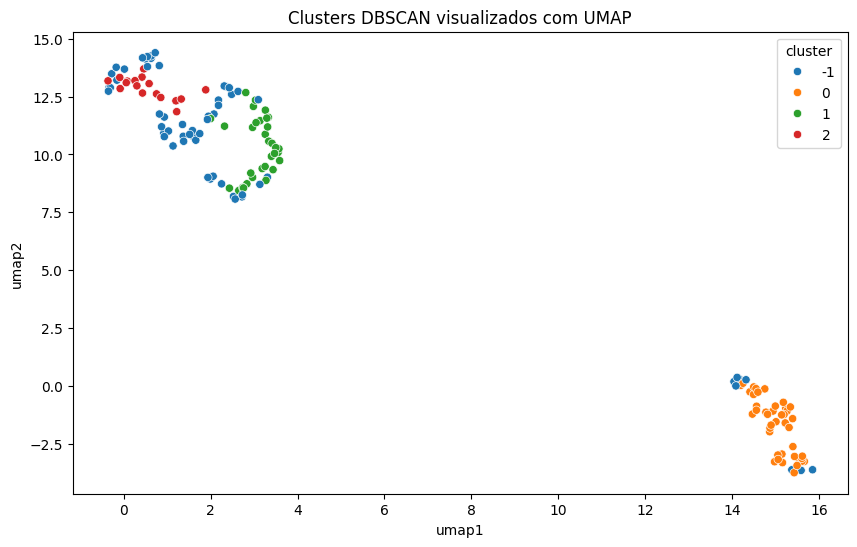


📌 Interpretação - UMAP:
• Mostra uma separação clara entre os grupos identificados.
• O grupo com rótulo -1 continua representando os pontos considerados ruído (fora de qualquer cluster).
• Diferente de PCA, o UMAP tenta preservar tanto a estrutura global quanto local, tornando visíveis padrões mais complexos.


📊 Distribuição de pontos por cluster:
cluster
-1    59
 0    42
 1    32
 2    17
Name: count, dtype: int64


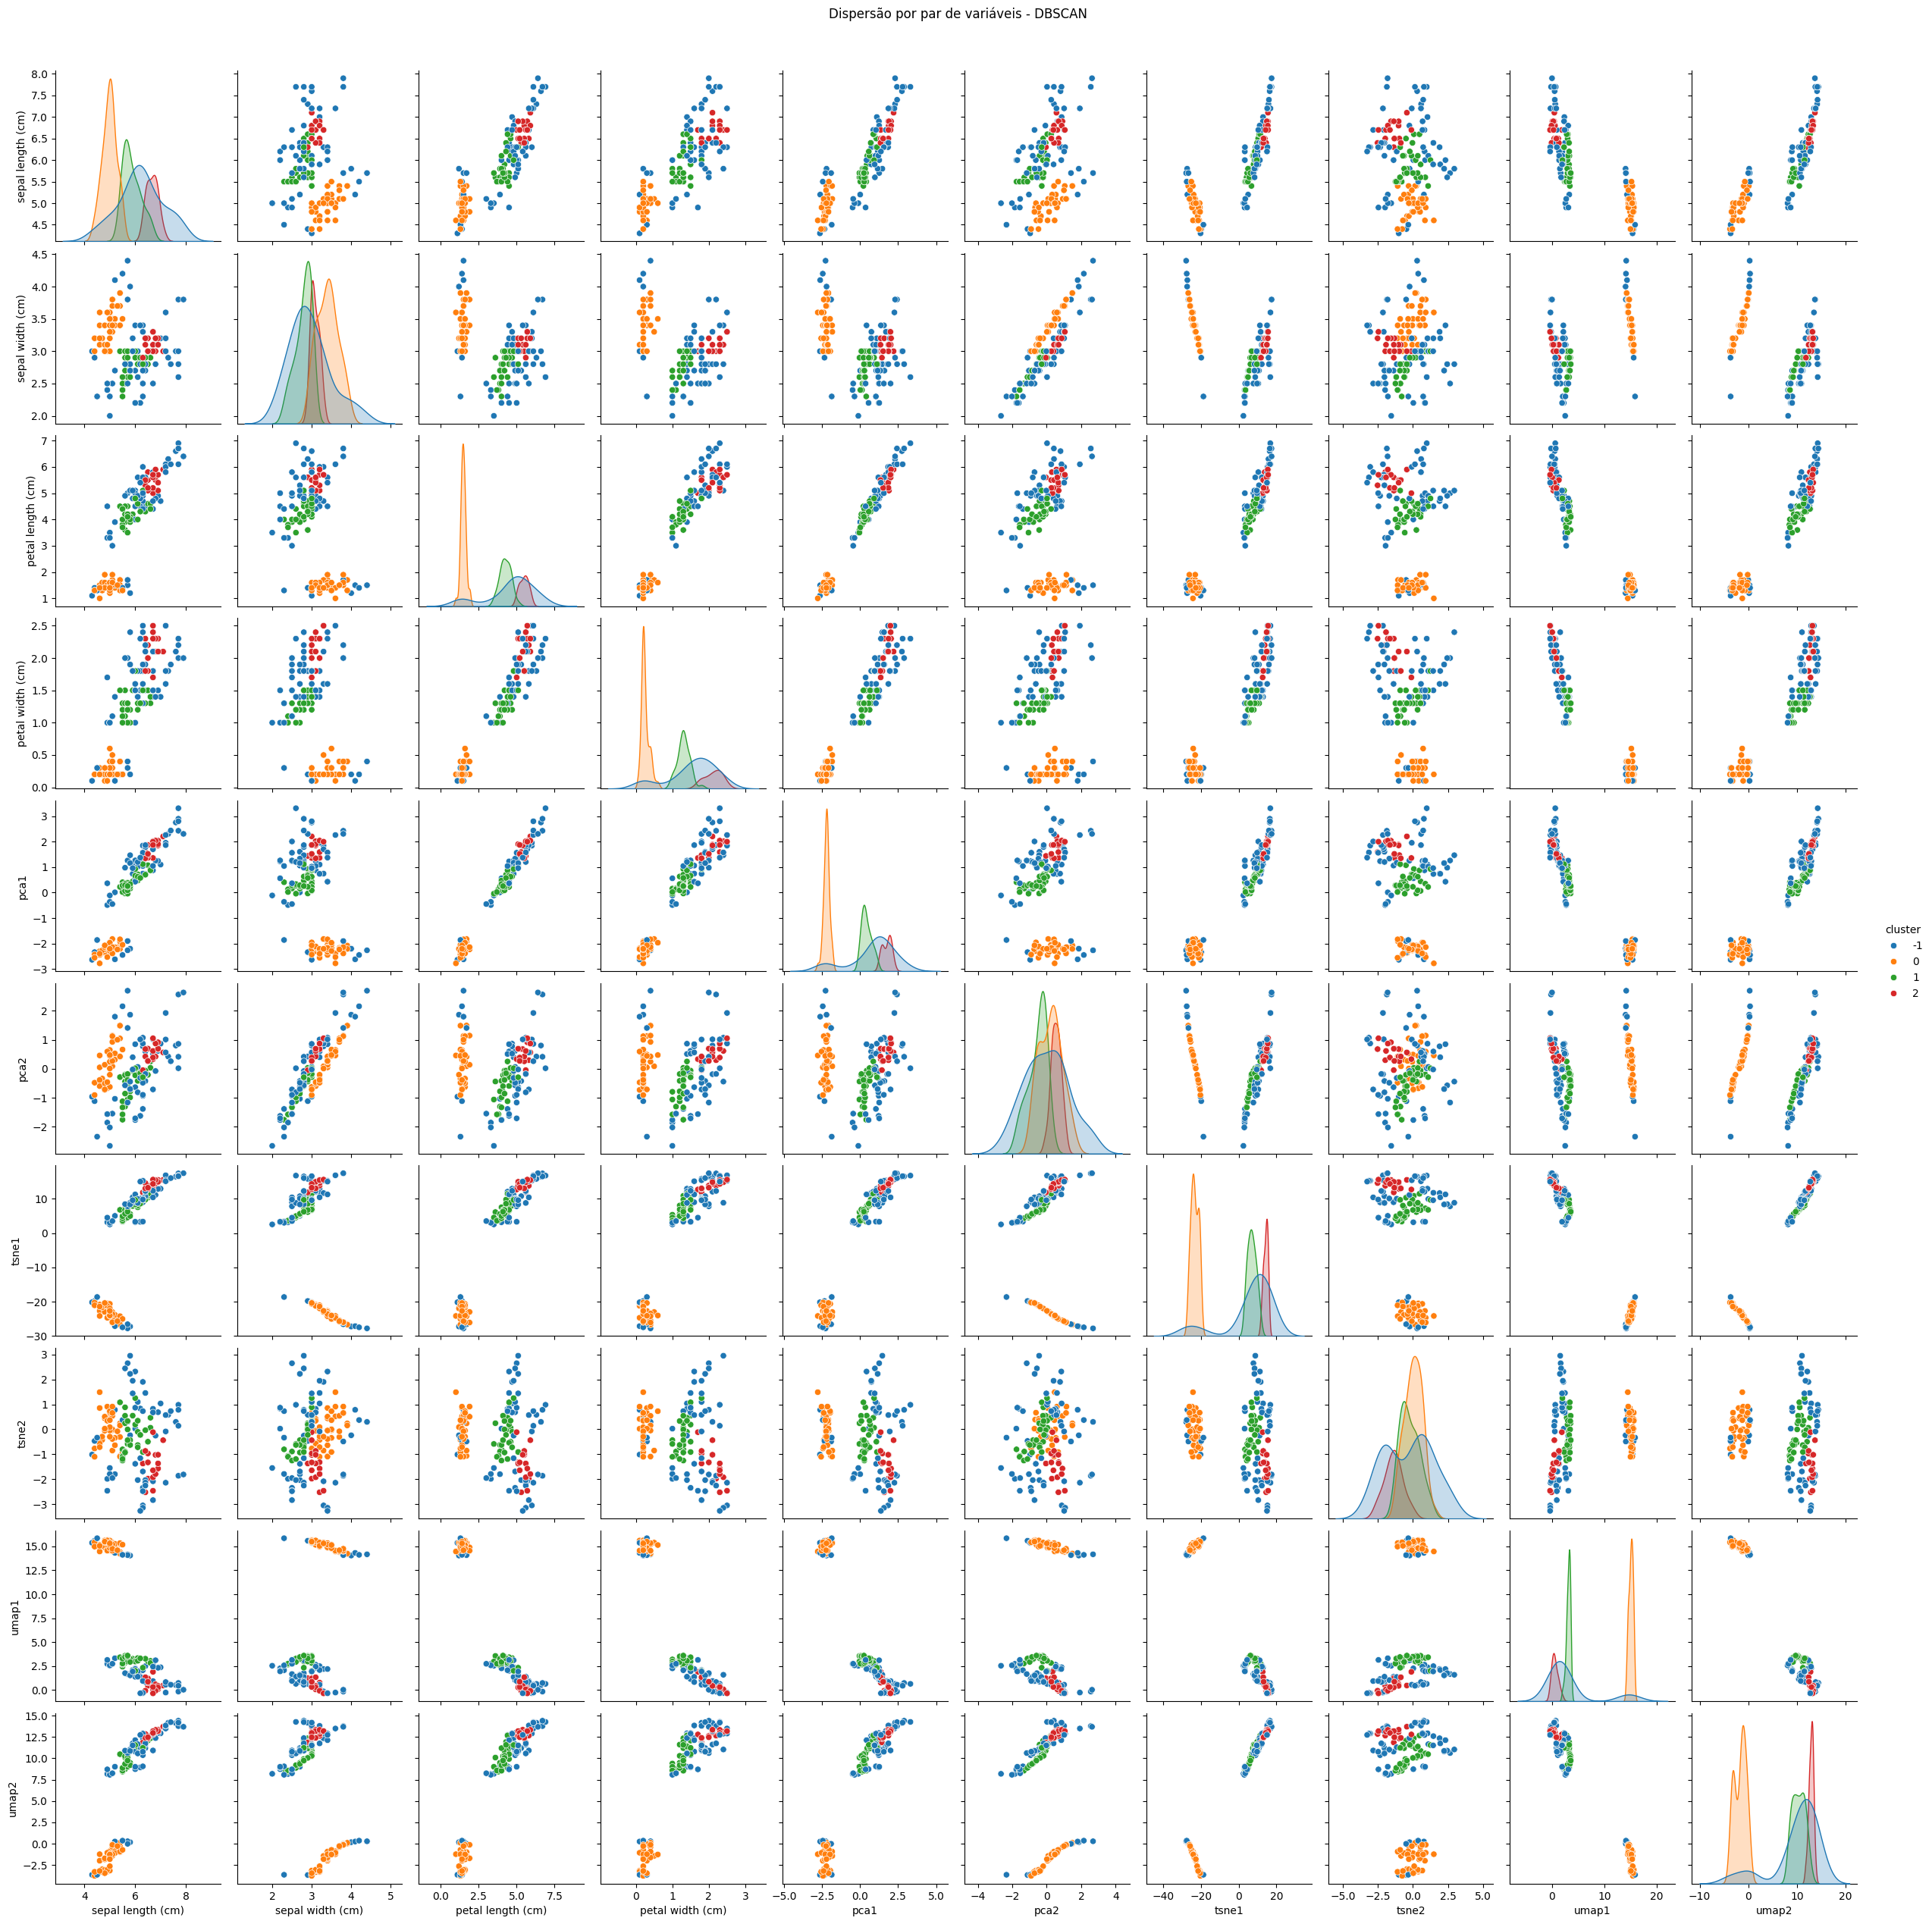

In [5]:
# 🔁 Projeto Profissional: Iris + DBSCAN + Avaliações + Visualizações

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# 📥 1. Carregar o dataset Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# 🔍 2. Análise exploratória
print("\n📌 Estrutura dos dados:")
print(df.info())
print("\n📌 Estatísticas descritivas:")
print(df.describe())
print("\n📌 Correlação entre variáveis:")
print(df.corr())
print("\n📌 Primeiras amostras:")
print(df.head())

# 📈 3. Visualização da correlação
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title("Correlação entre variáveis - Iris")
plt.show()

# ⚙️ 4. Normalização dos dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# ✅ 5. Definir parâmetros para DBSCAN
n_features = scaled_data.shape[1]
min_samples = n_features * 2  # Regra prática: 2x n_features

# 🔍 Testar diferentes valores de eps para melhorar o agrupamento
possible_eps = [0.4, 0.5, 0.6, 0.7]
best_labels = None
best_eps = eps = 0.6
best_silhouette = -1

for test_eps in possible_eps:
    temp_dbscan = DBSCAN(eps=test_eps, min_samples=min_samples)
    temp_labels = temp_dbscan.fit_predict(scaled_data)
    temp_mask = temp_labels != -1
    n_clusters = len(set(temp_labels)) - (1 if -1 in temp_labels else 0)
    if n_clusters == 3:
        score = silhouette_score(scaled_data[temp_mask], temp_labels[temp_mask])
        if score > best_silhouette:
            best_silhouette = score
            best_labels = temp_labels
            best_eps = test_eps

# Usar os melhores parâmetros encontrados (se houver)
if best_labels is not None:
    eps = best_eps
    labels = best_labels
    print(f"\n✅ Melhor valor de eps encontrado para 3 clusters: {eps}")
else:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(scaled_data)

df['cluster'] = labels

# 📊 7. Avaliação dos Clusters
mask = labels != -1
if len(set(labels)) - (1 if -1 in labels else 0) > 1:
    silhouette = silhouette_score(scaled_data[mask], labels[mask])
    davies = davies_bouldin_score(scaled_data[mask], labels[mask])
    calinski = calinski_harabasz_score(scaled_data[mask], labels[mask])
    print("\n🔍 Avaliações dos clusters (ignorando outliers):")
    print(f"- Silhouette Score: {silhouette:.4f}  → (Intervalo: -1 a 1 | Ideal: > 0.5 | Quanto mais próximo de 1, melhor separação e coesão)")
    print(f"- Davies-Bouldin Index: {davies:.4f}  → (Intervalo: >= 0 | Ideal: < 0.6 | Quanto menor, melhor qualidade do agrupamento)")
    print(f"- Calinski-Harabasz Index: {calinski:.4f}  → (Sem limite fixo | Ideal: quanto maior, melhor → valores > 100 geralmente são bons)")
else:
    print("\n⚠️ Poucos clusters válidos para avaliação!")

print(f"\n📊 Número de clusters encontrados (excluindo outliers): {len(set(labels)) - (1 if -1 in labels else 0)}")

# 🎨 8. Visualizações dos clusters com diferentes reduções de dimensionalidade

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='tab10')
plt.title("Clusters DBSCAN visualizados com PCA")
plt.show()

print("""
📌 Interpretação - PCA:
• Os pontos foram agrupados com base em características semelhantes das flores.
• A cor representa o rótulo atribuído pelo DBSCAN:
   →  0, 1, 2 são clusters encontrados automaticamente.
   → -1 representa pontos considerados outliers (fora de regiões densas).
• A projeção com PCA ajuda a visualizar a separação geral entre os grupos em apenas 2 dimensões.
""")

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)
df['tsne1'] = tsne_result[:, 0]
df['tsne2'] = tsne_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tsne1', y='tsne2', hue='cluster', palette='tab10')
plt.title("Clusters DBSCAN visualizados com t-SNE")
plt.show()

print("""
📌 Interpretação - t-SNE:
• Clusters aparecem mais espalhados para evidenciar separações locais entre pontos similares.
• O rótulo -1 mostra os outliers (dados ruidosos).
• A técnica foca na preservação de vizinhanças locais e, por isso, evidencia bem pequenas diferenças entre grupos.
""")

# UMAP
umap_reducer = UMAP(n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(scaled_data)
df['umap1'] = umap_result[:, 0]
df['umap2'] = umap_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='umap1', y='umap2', hue='cluster', palette='tab10')
plt.title("Clusters DBSCAN visualizados com UMAP")
plt.show()

print("""
📌 Interpretação - UMAP:
• Mostra uma separação clara entre os grupos identificados.
• O grupo com rótulo -1 continua representando os pontos considerados ruído (fora de qualquer cluster).
• Diferente de PCA, o UMAP tenta preservar tanto a estrutura global quanto local, tornando visíveis padrões mais complexos.
""")

# 🔢 Distribuição de amostras por cluster
print("\n📊 Distribuição de pontos por cluster:")
print(df['cluster'].value_counts().sort_index())

# 📊 Pairplot com rótulos DBSCAN
sns.pairplot(df, hue='cluster', palette='tab10')
plt.suptitle("Dispersão por par de variáveis - DBSCAN", y=1.02)
plt.show()